# Useful functions

In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pathlib import Path

data = pd.DataFrame({'let':['a', 'b', 'c', 'd'],
                     'num':range(1,5)})
p = Path('.').cwd()
data

,let,num
0,a,1
1,b,2
2,c,3
3,d,4


## Work with files

### Save pandas DF as csv

In [64]:
def saveCSV(df, folder, filename, ignore_exist=False, **kwargs):
    '''Wrapper for pandas.DataFrame.to_csv method which allows creating folders if needed
    Input:
        df : pd.DataFrame
            pandas DataFrame to save
        filename : string
            name for a file without extension
        ignore_exist : bool
            flag of overwriting existing files. If True - existing file with 
            specified <filename> will be overwritten, else a new file will be created
            and current time will be added to file name
        **kwargs
            other parameters to pass to <to_csv> method of DataFrame
    Output: None
        
    '''
    from pathlib import Path
    from datetime import datetime
    filepath = Path('.').cwd() / folder / (filename + '.csv')
    try:
        filepath.parent.mkdir(exist_ok=True)
        if filepath.exists() and not ignore_exist:
            filepath = filepath.parent / (filename + '_' + str(datetime.now())[11:19].replace(':','-') + '.csv')
        df.to_csv(filepath, **kwargs)
        print(f'Data successfully saved in file "{filepath.parts[-1]}" in subdirectory "{folder}"')        
    except FileExistsError:
        print('Saving failed. File with such name already exists. Choose another name for subdirectory')


In [87]:
saveCSV(data, 'test2', 'test_df5', ignore_exist=False, index=None)

Data successfully saved in file "test_df5.csv" in subdirectory "test2"


### Read multiple similar files

In [75]:
data2 = pd.DataFrame({'num':range(1,5),
                      'let':['a', 'b', 'c', 'd']})
saveCSV(data2, 'test2', 'test_df6')

Data successfully saved in file "test_df6.csv" in subdirectory "test2"


In [95]:
def readManyCSV(paths, **kwargs):
    '''Read many files into single pandas DataFrame
    It's preferable to pass DataFrames of same structure (same columns). 
    If number of columns differs in any of the files, a warning
    will be printed 
    Input:
        paths : list-like iterable
            a list of filenames
    '''
    df = pd.DataFrame()
    cols = []
    i
    for i, p in enumerate(paths):
        df = df.append(pd.read_csv(p, **kwargs), sort=False)
        if i == 0:
            cols.append(len(df.columns))
    cols.append(len(df.columns))
    if cols[0] != cols[1]:
        print('One or more files have different number of columns')
    return df

test_paths = (p / 'test2').glob('*.csv')
readManyCSV('test2/test_df5.csv', index_col=None)

FileNotFoundError: [Errno 2] File b't' does not exist: b't'

## Work with dates

### Get first day of month

In [115]:
def getFirstDayOfMonth(dt, str_format='%Y-%m-%d'):
    if isinstance(dt, str):
        dt = datetime.datetime.strptime(dt, str_format)
    return datetime.date(dt.year, dt.month, 1)
    
str(getFirstDayOfMonth('2018-01-21') )

'2018-01-01'

### Get last day of month

In [127]:
def getLastDayOfMonth(dt, str_format='%Y-%m-%d'):
    if isinstance(dt, str):
        dt = datetime.datetime.strptime(dt, str_format)
    m = dt.month % 12 + 1
    y = dt.year if dt.month != 12 else dt.year+1
    
    return datetime.date(y, m, 1) + datetime.timedelta(days=-1)
    
getLastDayOfMonth('2016-12-21') 

datetime.date(2016, 12, 31)

### Calculate date from specific date

In [167]:
def calcDate(dt, d_year=0, d_month=0, str_format='%Y-%m-%d'):
    if isinstance(dt, str):
        dt = datetime.datetime.strptime(dt, str_format)
    n_m = dt.month + d_month % 12
    n_y = dt.year + d_year + d_month // 12
    return datetime.date(n_y, n_m, dt.day) + datetime.timedelta(days=-1)

calcDate('2018-01-07', -1, 1)

datetime.date(2017, 2, 6)

## Statistics

### Generate normal random sample

In [37]:
def getNormalSample(size, loc=0, scale=1):
    return sp.stats.norm.rvs(size=size, loc=loc, scale=scale)

### Generate uniform random sample
`TODO`

### Bootstrapping

In [9]:
def getBootstrapSamples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method.
    Input: 1D numpy.array"""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

### Interval estimate

In [38]:
def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [52]:
def calcIntervals(stat, n_sigm):
    mean = np.mean(stat)
    sem = np.std(stat) / np.sqrt(len(stat))
    sem = np.std(stat)
    
    return [mean - n_sigm*sem, mean + n_sigm*sem]

In [192]:
np.random.seed(0)
test = getNormalSample(100, 0, 1)
getBootstrapSamples(test, 10)
calcIntervals(test, 1.959964)

[-1.9156049003492013, 2.0352209314181713]

In [191]:
sp.stats.norm.cdf([-1.959964, 1.959964]) 

array([0.025, 0.975])

In [193]:
stat_intervals(test, .05)

array([-1.71677671,  1.92470444])

## Plotting

In [43]:
size  = 1000
y     = np.random.choice([0,1], size)
preds = np.random.choice(np.linspace(0, 1, 101), size)

In [102]:
a = iter('ads')
b = iter(['ads'])
type(a), type(b)

(str_iterator, list_iterator)

### AUC ROC

In [57]:
def plotROC(y_true, probas, name=''):
    ''' Функция для отрисовки ROC-кривой
    Вход: истнниые значения таргета (y_true) и предсказанные вероятности (probas)
    Выход: графие и значение AUR ROC'''
    from sklearn.metrics import roc_curve, roc_auc_score
    x = np.linspace(0,1)
    tpr, fpr, thr = roc_curve(y_true, probas)
    score = roc_auc_score(y_true, probas)
    plt.plot(tpr, fpr, label=f'{name} AUC={score:0.3f}')
    plt.plot(x, x, c='gray')    
    plt.title('AUC ROC')
    plt.xlabel('FPR')
    plt.ylabel('TPR');
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()

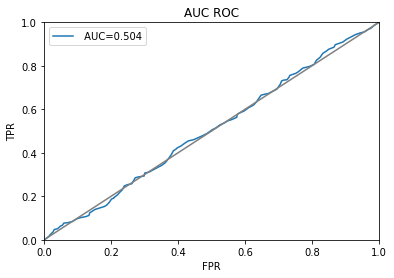

In [58]:
plotROC(y, preds)

### Precision-Recall curve

In [ ]:
def plotPR(y_true, probas, points=None, name='')
    ''''''
    pr, rec, thr = precision_recall_curve(y_test, preds)

    plt.plot(rec, pr)
    plt.ylabel('precision')
    plt.xlabel('recall')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Precision-recall curve')


## Temp

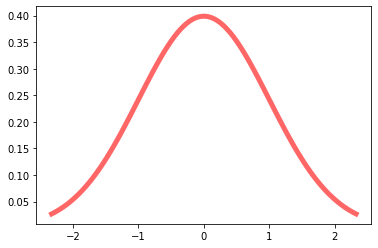

In [110]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.0),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [125]:
import scipy.stats

1.293410425148529

In [157]:
del point

Point = -0.90
PDF@point = 0.26717
CDF@point = 0.18527


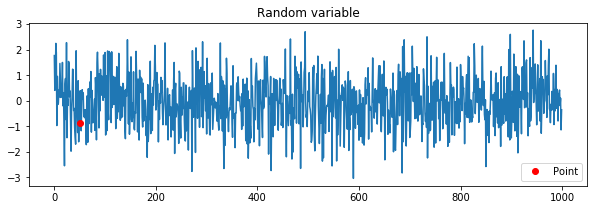

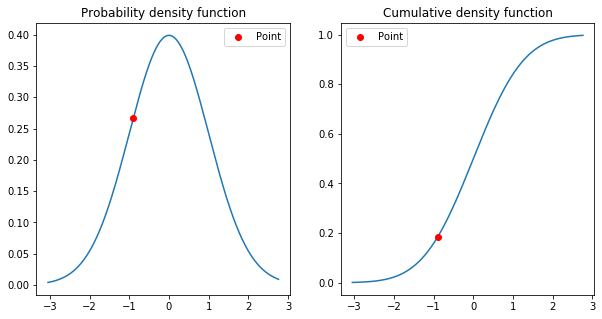

In [167]:
def demonstrateNormalDistibution(size, point_pos=0.05, **kwargs):
    np.random.seed(0)
    test = sp.stats.norm.rvs(size=size, **kwargs)
    point_pos = int(np.round(size * point_pos))
    point = test[point_pos]
    x = np.linspace(min(test), max(test), len(test))
    print(f'Point = {test[point_pos]:0.2f}')
    print(f'PDF@point = {norm.pdf(point):.5f}\nCDF@point = {norm.cdf(point):.5f}')

    plt.figure(figsize=(10,3))
    plt.title('Random variable')
    plt.plot(test)
    plt.plot(point_pos, point, 'ro', label='Point')
    plt.legend()
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title('Probability density function')
    plt.plot(x, norm.pdf(x))
    plt.plot(point, norm.pdf(point), 'ro', label='Point')
    plt.legend()

    plt.subplot(122)
    plt.title('Cumulative density function')
    plt.plot(x, norm.cdf(x))
    plt.plot(point, norm.cdf(point), 'ro', label='Point')
    plt.legend()
demonstrateNormalDistibution(1000)

In [116]:
norm.ppf(0.005)

-2.575829303548901